<a href="https://colab.research.google.com/github/rvaidya2-ksu/IT7103/blob/main/IT7103_Assignment5_rvaidya2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



*   IT 7103
*   Assignment 5
*   Rajshree Vaidya








**LOADING THE DATA**

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/drive/MyDrive/real_estate_value.csv')
data.head()

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [93]:
data.shape

(414, 6)

In [10]:
data.describe()

,HouseAge,DistanceToMRT,NoOfStores,Latitude,Longitude,UnitPrice
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [11]:
data.dtypes

HouseAge         float64
DistanceToMRT    float64
NoOfStores         int64
Latitude         float64
Longitude        float64
UnitPrice        float64
dtype: object

**SPLITTING THE DATA INTO 25% TEST AND 75% TRAINING**

In [12]:
from sklearn.model_selection import train_test_split

traindata, testdata = train_test_split(data, test_size=0.25) #test_size=0.25 means that 25% of data will be for testing, 75% for training
traindata.shape, testdata.shape

((310, 6), (104, 6))

**VISUALIZING NECESSARY COLUMNS IN THE DATA**

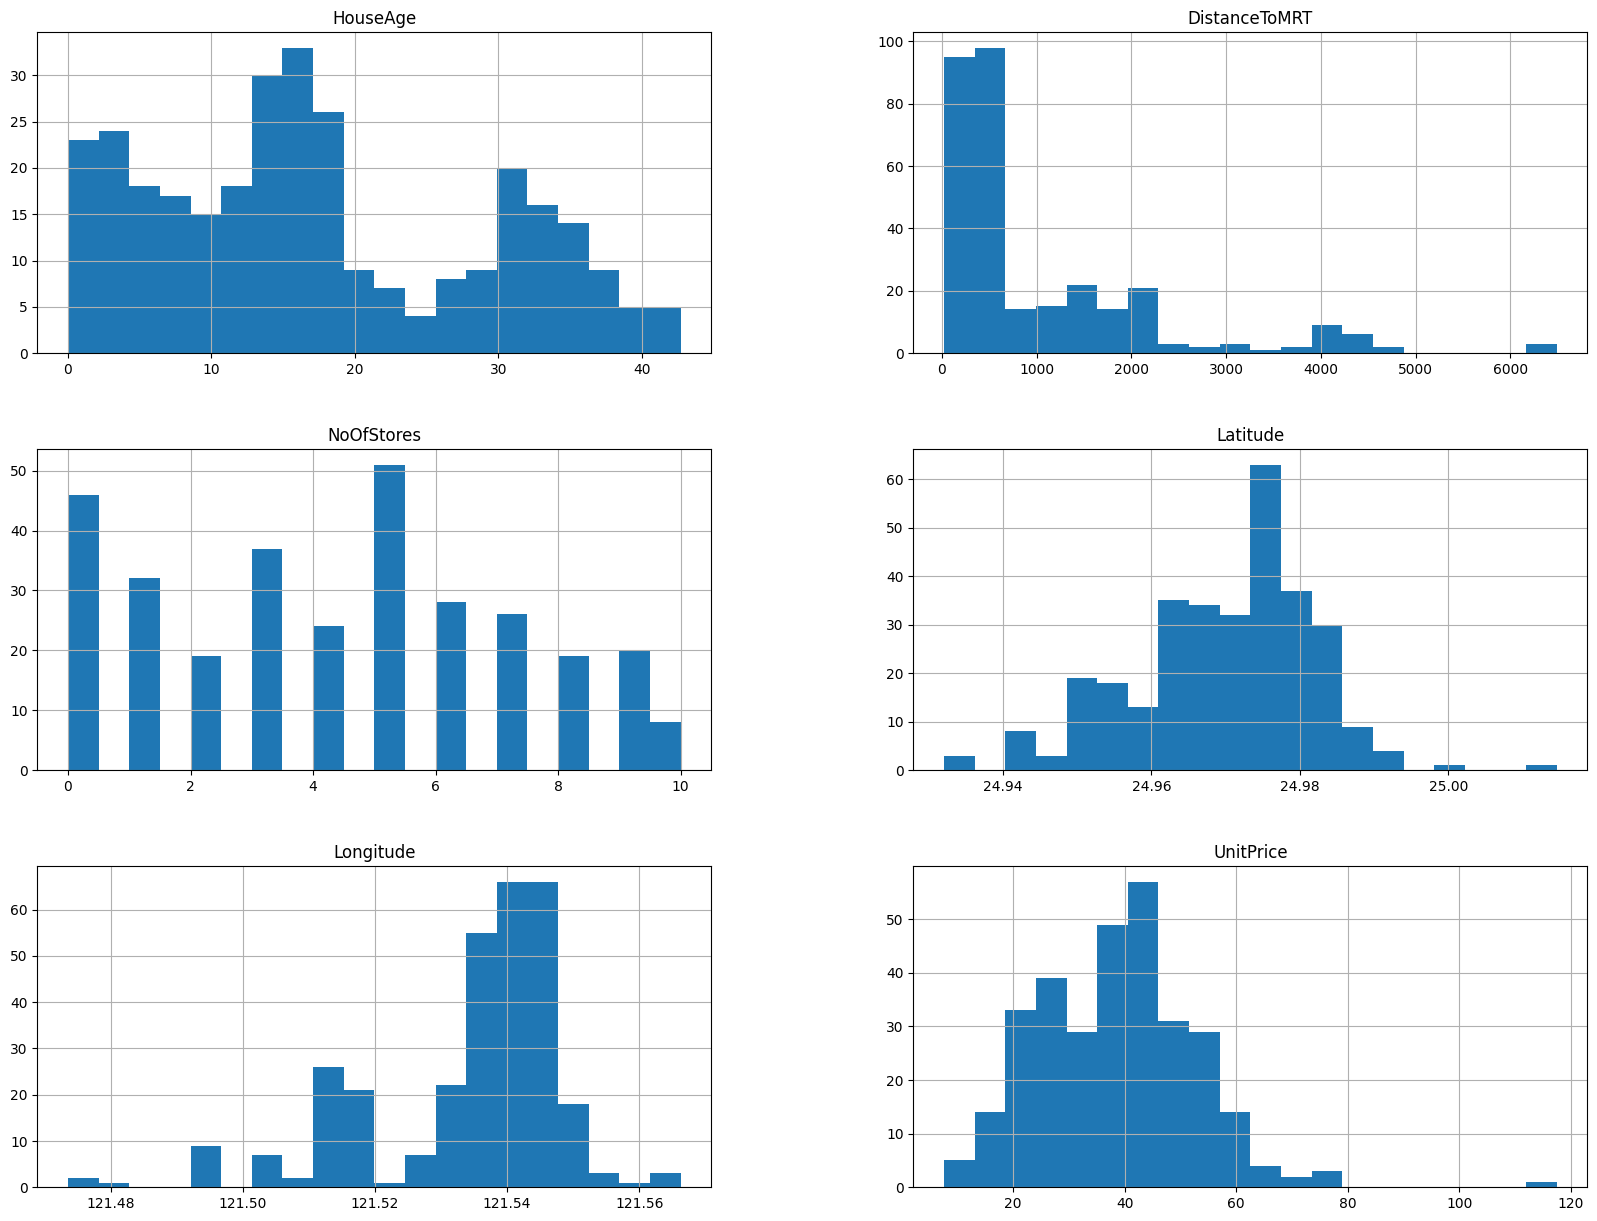

In [13]:
from matplotlib import pyplot as plt

traindata.hist(bins=20, figsize=(20,15))
plt.show()

In [14]:
num_cols = [column for column in data.columns if (traindata[column].dtypes == np.int64) or (traindata[column].dtypes == np.float64)]

num_cols

['HouseAge',
 'DistanceToMRT',
 'NoOfStores',
 'Latitude',
 'Longitude',
 'UnitPrice']

**COLUMNS OF THE DATASET**

In [15]:
num_cols = [ 'NoOfStores', 'Latitude']
log_cols = ['HouseAge', 'DistanceToMRT', 'Longitude']
target = ['UnitPrice']

**EXAMINING THE DATA**
*   The dataset real_estate_value has the information of over 400 houses in Taiwan and their Unit Price (price per squared unit). The total number of rows in this dataset are 414 and total of 6 columns including the target variable (unit price).

*   Splitting the data into 25% testing and 75% training, so as to train the data and fit into the model to test the data performance.






**PROCESSING PIPELINE**

**Build a pipeline as follows:**
  

1. **Numeric and symmetric columns: Imputation  -->  Standardization**

*   **Imputation:** Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can then be then used for machine learning.

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).


*   **Standardization:**It uses StandardScaler() for scaling and standardizing the data in sklearn. This process converts data to a common format to enable users to process and analyze it. It transforms the values in the column so that they have mean of 0 and standard deviation of 1.

2. **Numeric and skewed columns: Imputation  -->  Log transformation  --> Standardization**


*   **Imputation:**
*  **Log transformation:** A data transformation technique called log transformation substitutes a log(x) for each variable x. Typically, the analyst oversees selecting the logarithm base, which is determined by the objectives of
statistical modeling. Since, column HouseAge, DistanceToMRT, Longitude were skewed so used log transformation to take care of the skewness.
*  **Standardization:**






In [27]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

'''def remove_0(X):
    X.loc[X['HouseAge']==0, 'HouseAge'] = np.nan
    X.loc[X['DistanceToMRT']==0, 'DistanceToMRT'] = np.nan
    X.loc[X['Longitude']==0, 'Longitude'] = np.nan
    return X'''

def log_transform(data):
    return np.log(data + 1e-10) # Adding small constant to avoid log(0)

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('standardize', StandardScaler())
])
#log pipeline with log transformation
log_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('log transform', FunctionTransformer(log_transform)),
    ('standardize', StandardScaler()),
])

processing_pipeline = ColumnTransformer([
    ('symmetric', num_pipeline, num_cols),
    ('skewed', log_pipeline, log_cols)
])

In [28]:
processing_pipeline

ColumnTransformer(transformers=[('symmetric',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['NoOfStores', 'Latitude']),
                                ('skewed',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('log transform',
                                                  FunctionTransformer(func=<function log_transform at 0x7a5ca84ea3b0>)),
                                                 ('standardize',
                                                  StandardScaler())]),
                                 ['HouseAge', 'DistanceToMRT', 'Longitude'])])

**TRAINING THE DECISION TREE MODEL PIPELINE**

In [77]:
from sklearn.tree import DecisionTreeRegressor

#data.dropna(inplace=True)
tree_pipeline = Pipeline([
    ('processing', processing_pipeline),
    ('dtr',DecisionTreeRegressor())
])


tree_pipeline.fit(traindata, traindata[target])

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symmetric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['NoOfStores', 'Latitude']),
                                                 ('skewed',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x7a5ca84ea3b0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['HouseAge', 'DistanceToMRT',
                                                   'Longitude'])])),
                ('dtr', DecisionTreeRegressor())])

In [83]:
from sklearn import metrics
tree_pred = tree_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], tree_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], tree_pred))

MAE = 0.35666666666666674
MSE = 1.6400645161290326


In [84]:
tree_pred_test = tree_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], tree_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], tree_pred_test))

MAE = 5.419711538461538
MSE = 56.83592681623932


**FINE TUNING THE DECISION TREE MODEL**

In [85]:
from sklearn.model_selection import GridSearchCV
data_size = traindata.shape[0]
n_features = processing_pipeline.fit_transform(traindata).shape[1]

param_grid = {
    'dtr__max_depth' : [4, 5, 6],
    'dtr__min_samples_split' : [data_size//50, data_size//25, data_size//15, data_size//10],
    'dtr__min_samples_leaf' : [data_size//50, data_size//25, data_size//15, data_size//10],
    'dtr__max_features' : [n_features//4, n_features//3, n_features//2, n_features],
    'dtr__max_leaf_nodes' : [5, 10, 15, 20]
}

grid_search = GridSearchCV(tree_pipeline, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(traindata, traindata[target])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('symmetric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['NoOfStores',
                                                                          'Latitude']),
                                                                        ('skewed',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log...m at 0x7a5ca84ea3b0>)),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['HouseAge',
                                                                          'DistanceToMRT',
                                                                          'Longitude'])])),
                                       ('dtr', DecisionTreeRegressor())]),
             param_grid={'dtr__max_depth': [4, 5, 6],
                         'dtr__max_features': [1, 1, 2, 5],
                         'dtr__max_leaf_nodes': [5, 10, 15, 20],
                         'dtr__min_samples_leaf': [6, 12, 20, 31],
                         'dtr__min_samples_split': [6, 12, 20, 31]},
             return_train_score=True, scoring='r2')

**Since this is a regression problem, I am using MAE and MSE for performance testing.**

In [86]:
from sklearn import metrics
tree_pred = tree_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], tree_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], tree_pred))

MAE = 0.35666666666666674
MSE = 1.6400645161290326


In [87]:
tree_pred_test = tree_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], tree_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], tree_pred_test))

MAE = 5.419711538461538
MSE = 56.83592681623932


In [41]:
grid_search.best_estimator_

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symmetric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['NoOfStores', 'Latitude']),
                                                 ('skewed',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x7a5ca84ea3b0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['HouseAge', 'DistanceToMRT',
                                                   'Longitude'])])),
                ('dtr',
                 DecisionTreeRegressor(max_depth=5, max_features=5,
                                       max_leaf_nodes=15, min_samples_leaf=6,
                                       min_samples_split=31))])

In [69]:
grid_search.best_score_

0.6804042004115817

In [70]:
grid_search.score(testdata, testdata[target])

0.779816647623888

**TRAINING THE RANDOM FOREST PIPELINE**

In [88]:
from sklearn.ensemble import RandomForestRegressor

forest_pipeline = Pipeline([
    ('processing',processing_pipeline),
    ('rfr',RandomForestRegressor())
])

forest_pipeline.fit(traindata, traindata[target].values.ravel()) #.values will give the values in a numpy array (shape: (n,1)) and .ravel will convert that array shape to (n, ) (i.e. flatten it)

Pipeline(steps=[('processing',
                 ColumnTransformer(transformers=[('symmetric',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['NoOfStores', 'Latitude']),
                                                 ('skewed',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log '
                                                                   'transform',
                                                                   FunctionTransformer(func=<function log_transform at 0x7a5ca84ea3b0>)),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['HouseAge', 'DistanceToMRT',
                                                   'Longitude'])])),
                ('rfr', RandomForestRegressor())])

In [89]:
forest_pred = forest_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], forest_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], forest_pred))

MAE = 2.0420765373783953
MSE = 10.969447003306113


In [90]:
forest_pred_test = forest_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], forest_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], forest_pred_test))

MAE = 4.257741624694753
MSE = 37.849265775464374


**FINE TUNING THE RANDOM FOREST MODEL**

In [91]:
from sklearn.model_selection import GridSearchCV

rfr = Pipeline([
    ('processing', processing_pipeline),
    ('rfr', RandomForestRegressor())
])

data_size = traindata.shape[0]
n_features = processing_pipeline.fit_transform(traindata).shape[1]

param_grid = {
    'rfr__n_estimators' : [10, 25, 50],
    'rfr__max_depth' : [4, 5, 6],
    'rfr__min_samples_split' : [data_size//50, data_size//25, data_size//15, data_size//10],
    'rfr__min_samples_leaf' : [data_size//50, data_size//25, data_size//15, data_size//10],
    'rfr__max_features' : [n_features//4, n_features//3, n_features//2, n_features],
    'rfr__max_leaf_nodes' : [5, 10, 15, 20]
}

grid_search = GridSearchCV(rfr, param_grid, cv=5, scoring='r2', return_train_score=True)
#grid_search.fit(traindata, traindata[target].values.ravel())

In [92]:
grid_search.fit(traindata, traindata[target].values.ravel())


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(transformers=[('symmetric',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['NoOfStores',
                                                                          'Latitude']),
                                                                        ('skewed',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log '
                                                                                          'transform',
                                                                                          FunctionTransformer(func=<function log...
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['HouseAge',
                                                                          'DistanceToMRT',
                                                                          'Longitude'])])),
                                       ('rfr', RandomForestRegressor())]),
             param_grid={'rfr__max_depth': [4, 5, 6],
                         'rfr__max_features': [1, 1, 2, 5],
                         'rfr__max_leaf_nodes': [5, 10, 15, 20],
                         'rfr__min_samples_leaf': [6, 12, 20, 31],
                         'rfr__min_samples_split': [6, 12, 20, 31],
                         'rfr__n_estimators': [10, 25, 50]},
             return_train_score=True, scoring='r2')

In [71]:
forest_pred = forest_pipeline.predict(traindata)
print("MAE =", metrics.mean_absolute_error(traindata[target], forest_pred))
print("MSE =", metrics.mean_squared_error(traindata[target], forest_pred))

MAE = 2.010233924731186
MSE = 10.287566935846025


In [73]:
forest_pred_test = forest_pipeline.predict(testdata)
print("MAE =", metrics.mean_absolute_error(testdata[target], forest_pred_test))
print("MSE =", metrics.mean_squared_error(testdata[target], forest_pred_test))

MAE = 4.418506154609281
MSE = 39.89219017098424


In [74]:
grid_search.best_score_

0.6804042004115817

In [75]:
grid_search.score(testdata, testdata[target])

0.779816647623888

After Fine Tuning Decision Tree model, testdata values are:

*   Mean absolute error is 5.41
*   Mean squared error is 56.83



After Fine Tuning Random Forest model, testdata values are:
*   Mean absolute error is 4.41
*   Mean squared error is 39.89




grid_search.best_score_ = 0.68